## HW2
### Supervised Learning Models 
#### Gian Zlupko 

#### 1. Find the url for the California Test Score Data Set from the following website:

https://vincentarelbundock.github.io/Rdatasets/datasets.html

Read through the "DOC" file to understand the variables in the dataset, then use the following url to import the data.  

https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv

The target data (i.e. the dependent variable) is named "testscr".  You can use all  variables in the data except for "readscr" and "mathscr" in the following analysis.  (These two variables were used to generate the dependent variable).

In [1]:
import pandas as pd 
import numpy as np 

# load data
cal_data_full = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv") 

# subset the data to remove 'readscr' and 'mathscr' and the non-numeric data
cal_data = cal_data_full.loc[:, 'enrltot': 'elpct']


# print out first few rows after subsetting 
print(cal_data.head(5)) 

# store target and predictor variables 
y = cal_data['testscr']
X = cal_data.loc[:, cal_data.columns != 'testscr']


   enrltot   teachers    calwpct    mealpct  computer     testscr   compstu  \
0      195  10.900000   0.510200   2.040800        67  690.799988  0.343590   
1      240  11.150000  15.416700  47.916698       101  661.200012  0.420833   
2     1550  82.900002  55.032299  76.322601       169  643.599976  0.109032   
3      243  14.000000  36.475399  77.049202        85  647.700012  0.349794   
4     1335  71.500000  33.108601  78.427002       171  640.849976  0.128090   

       expnstu        str     avginc      elpct  
0  6384.911133  17.889910  22.690001   0.000000  
1  5099.380859  21.524664   9.824000   4.583333  
2  5501.954590  18.697226   8.978000  30.000002  
3  7101.831055  17.357143   8.978000   0.000000  
4  5235.987793  18.671329   9.080333  13.857677  


#### 1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature. 

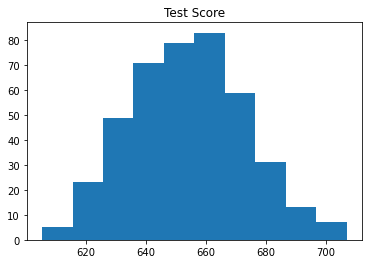

In [2]:
import matplotlib.pyplot as plt 

# visualize the target feature: testscr 
plt.hist(y)
plt.title('Test Score') 
plt.show()

The target variable, test score, appears to be normally distributed. Next, per my review of the data dictionary, I visualize three predictor variables that I believe will be related to the target variable, test scores. In particular, I've selected income ('avginc'; e.g. district avg. income), expenditure ('expnstu'; e.g. avg. school spending per student), and teachers (e.g. no. teachers per district)

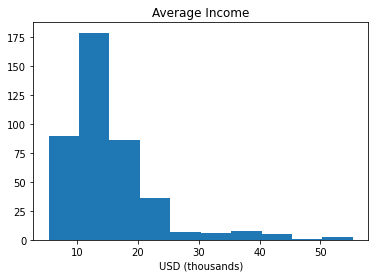

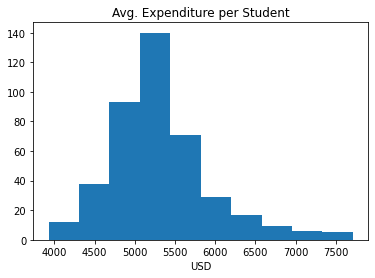

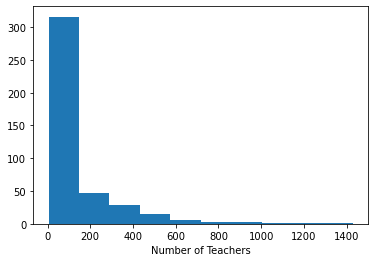

In [3]:
# plot average income
plt.hist(X['avginc']) 
plt.title("Average Income")
plt.xlabel('USD (thousands)')
plt.show() 

# plot avg. expenditure per student 

plt.hist(X['expnstu'])
plt.title('Avg. Expenditure per Student')
plt.xlabel('USD')
plt.show() 

# plot number of teachers 
plt.hist(X['teachers'])
plt.xlabel('Number of Teachers')
plt.show() 


The average spending (expenditure) per student appears to be fairly normally distributed. In contrast, the number of teachers per district is severly right skewed with the majority of districts possessing fewer than 200 teachers. Finally, the average income for each district was also slightly right skewed, though not as severly as the teacher distribution. 

#### 1.2 Visualize the dependency of the target on each feature from 1.1.

To accomplish this, I used scatterplots to visualize the bivariate relationships between the predictor variables presented above and test scores. To do so, instead of generating three scatterplots, I used the scatter grid plot from seaborn. Doing so does present the univariate distributions again but I like the efficient use of space that scatter grid offers for this task. 

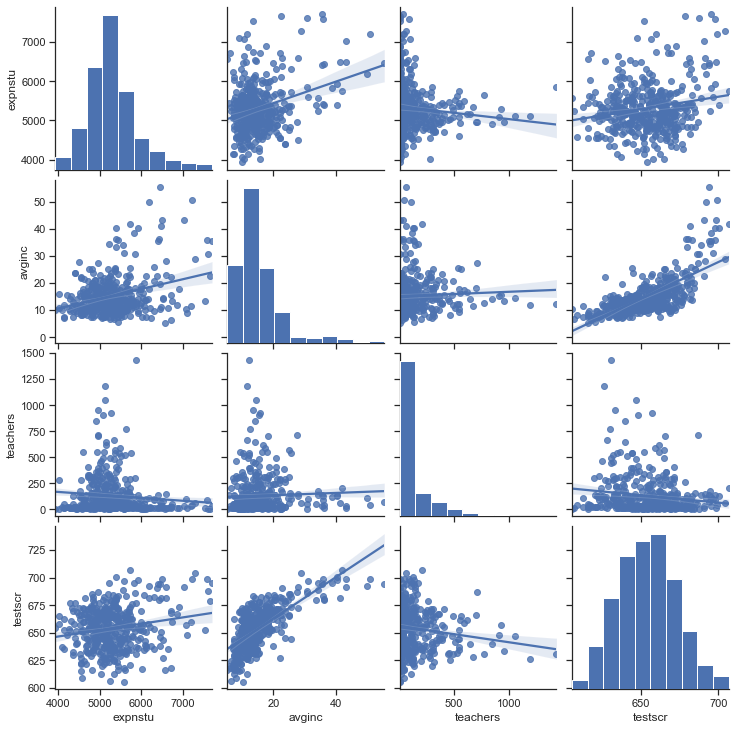

In [5]:
import seaborn as sns; sns.set(style = 'ticks', color_codes = True)

# create a subset of the original data 
plot_df = cal_data_full[['expnstu', 'avginc', 'teachers', 'testscr']]

# create the seaborn scatter plot grid with regression lines 
sns.pairplot(plot_df, kind = "reg")  


#### 1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

In [4]:
# set up training and test data 
from sklearn.model_selection import train_test_split

# perform data split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 300) 

#import cross validation functions from sk learn
from sklearn.model_selection import cross_val_score

# Set up CV with 5 fold
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)


After performing data splits and activating the CV functions from sklearn, I fit all four models using their default parameters and calculate their mean performance using 5-fold cross validation. 

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from statistics import mean 


print("KNN Regressor using 5-fold CV:\n{}".format(
mean(cross_val_score(KNeighborsRegressor(), X_train, y_train, cv=kfold))))

print("Linear Regression using 5-fold CV:\n{}".format(
mean(cross_val_score(LinearRegression(), X_train, y_train, cv=kfold))))


print("Ridge regression using 5-fold CV:\n{}".format(
mean(cross_val_score(Ridge(), X_train, y_train, cv=kfold))))


print("Lasso regression using 5-fold CV:\n{}".format(
mean(cross_val_score(Lasso(), X_train, y_train, cv=kfold))))



KNN Regressor using 5-fold CV:
0.01353483933842734
Linear Regression using 5-fold CV:
0.7757202102778243
Ridge regression using 5-fold CV:
0.7746220744309076
Lasso regression using 5-fold CV:
0.7745824701325399


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91.31261672276378, tolerance: 8.16751976588816
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2724.287127391086, tolerance: 8.463100722157392
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244.42518037612172, tolerance: 8.725539666838987
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarnin

We can see through the error messages that the models did not reach convergence without using scaled data. L1 and L2 regularizes assume that the data are centered around zero, so it is not surprising that we received error messages without scaling the data first. The Knn regressor performed paticularly poorly on the non-scaled data. In the next code chunk, I use Standar Scaler for preprocessing the data and refit the same models above to determine if Standard Scaler is useful in the current context.

In [40]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler() 
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)


# KNN Regressor with CV
print("KNN Regressor on scaled data using 5-fold CV:\n{}".format(
mean(cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train, cv=kfold))))

# Linear regression with CV 
print("Linear regression on scaled data using 5-fold CV:\n{}".format(
mean(cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=kfold))))

# Ridge regression with CV
print("Ridge regression on scaled data using 5-fold CV:\n{}".format(
mean(cross_val_score(Ridge(), X_train_scaled, y_train, cv=kfold))))

# Lasso regression with CV
print("Lasso regression on scaled data using 5-fold CV:\n{}".format(
mean(cross_val_score(Lasso(), X_train_scaled, y_train, cv=kfold))))



KNN Regressor on scaled data using 5-fold CV:
0.7348549682126415
Linear regression on scaled data using 5-fold CV:
0.7757202102778256
Ridge regression on scaled data using 5-fold CV:
0.7770334584621673
Lasso regression on scaled data using 5-fold CV:
0.7768586391090692


We an see that scaling the training data significantly improved the KNN regressor's performance and it also removed the errors that we were receiving about model convergence. 

#### 1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

In [44]:
from sklearn.model_selection import GridSearchCV
import numpy as np

number_neighbors = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

# fit model and use grid search cv to determine best number of neighbors 
knn_grid = GridSearchCV(KNeighborsRegressor(), number_neighbors, cv = 5)

# use meta model to fit and predict 
knn_grid.fit(X_train_scaled, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(knn_grid.best_score_))
print("best parameters: {}".format(knn_grid.best_params_))

best mean cross-validation score: 0.741
best parameters: {'n_neighbors': 8}


In [34]:
# Ridge regression 

# create an array with 1:10 values for alpha
parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1, 0.5, 10, 10]}

# run the grid search function
ridge_grid = GridSearchCV(Ridge(), param_grid = parameters, cv = 5)

#use meta model methods to fit score and predict model:
ridge_grid.fit(X_train_scaled, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(ridge_grid.best_score_))
print("best parameters: {}".format(ridge_grid.best_params_))
print("test-set score: {:.3f}".format(ridge_grid.score(X_test, y_test)))



best mean cross-validation score: 0.778
best parameters: {'alpha': 10}
test-set score: -46043.426


In [39]:
# Lasso regression 

# run the grid search function for lasso 
lasso_grid = GridSearchCV(Lasso(max_iter = 100000), param_grid = parameters, cv = 5)

#use meta model methods to fit score and predict model:
lasso_grid.fit(X_train_scaled, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(lasso_grid.best_score_))
print("best parameters: {}".format(lasso_grid.best_params_))

best mean cross-validation score: 0.780
best parameters: {'alpha': 0.5}


Using grid search CV to tune the parameters did improve slightly improve each models' performance. 

#### 1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

In [51]:
# evaluate coefficients for the ridge model 
# best model was determined above to have an alpha value of 10 

ridge10 = Ridge(alpha = 10).fit(X_train_scaled, y_train)


# calculating coefficients

coeff_ridge = pd.DataFrame(X_train.columns)
coeff_ridge['Coefficient Estimate'] = pd.Series(ridge10.coef_)
print(coeff_ridge.head(5)) # print strongest coefficients in the ridge model 

# lasso model 

lasso_05 = Lasso(alpha = 0.5).fit(X_train_scaled, y_train)

coeff_lasso = pd.DataFrame(X_train.columns)
coeff_lasso['Coefficient Estimate'] = pd.Series(lasso_05.coef_)
print(coeff_lasso.head(5))



          0  Coefficient Estimate
0   enrltot             -0.612886
1  teachers              0.257547
2   calwpct             -1.694115
3   mealpct             -8.611304
4  computer              0.353899
          0  Coefficient Estimate
0   enrltot             -0.000000
1  teachers             -0.000000
2   calwpct             -0.737914
3   mealpct             -9.770902
4  computer             -0.000000


In [ ]:
#test git 